**Practica 5: Procesamiento de imagenes**

José Alberto López Alvarez

Mat. 1553133

**Pillow**

Primero importamos la imagen que queramos analizar y confirmamos su formato:

In [3]:
from PIL import Image
filename = "/content/Arbol.jpg"
with Image.open(filename) as img:
  img.load()

type(img)

isinstance(img, Image.Image)

True

Cargamos la imagen para su visualización: y ver formatos y tamaños

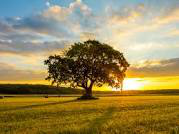

In [4]:
img

In [5]:
print(img.format)
print(img.size)
print(img.mode)

JPEG
(179, 134)
RGB


Ahora revisaremos algunos recortes en la imagen con la funcion crop

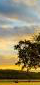

In [6]:
cropped_img = img.crop((30, 15, 70, 100))
cropped_img.size
cropped_img

Ajustamos la resolución de la imagen

In [7]:
low_res_img = cropped_img.resize((cropped_img.width // 2, cropped_img.height // 2))
low_res_img

In [8]:
low_res_img = cropped_img.reduce(2)
low_res_img

Podemos guardar los recortes de la imagen y su resolución de la siguiente manera:

In [9]:
cropped_img.save('/content/crooped_img.jpg')
low_res_img.save('/content/low_res_crop.jpg')

**Manipulacion basica de imagenes**

La manipulacion de imagenes nos ayuda con los movimientos en las imagenes de izquierda a derecha, de arriba a abajo o bien cpon la rotación de la imagen

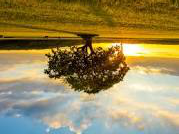

In [10]:
converted_abajo_img = img.transpose(Image.FLIP_TOP_BOTTOM)
converted_abajo_img

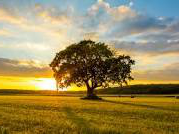

In [11]:
converted_espejo_img = img.transpose(Image.FLIP_LEFT_RIGHT)
converted_espejo_img

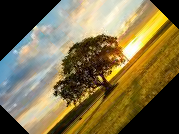

In [12]:
rotated_img = img.rotate(45)
rotated_img

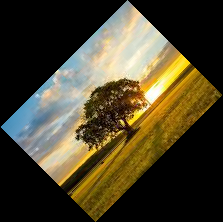

In [13]:
rotated_img = img.rotate(45, expand=True)
rotated_img

**Diferentes modos de imagen**

Como mencionamos anteriormente, una imagen es un vector de pixeles donde cada pixel corresponde a un color. Cada pixel
puede ser representado por uno o mas valores. En el caso de las imagenes RGB por ejemplo, si tenemos una del tamano
100x100, los pixeles se representan como 100x100x3.
El modo de una imagen describe con qué tipo de imagen está trabajando. Pillow admite la mayoría de los modos estándar,
incluidos blanco y negro (binario), escala de grises, RGB, RGBA y CMYK.


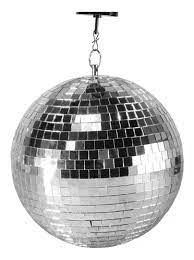

In [14]:
filename = "/content/disco.jpg"
with Image.open(filename) as img:
 img.load()
cmyk_img = img.convert("CMYK")
gray_img = img.convert("L")
gray_img

In [15]:
print(img.getbands())
print(cmyk_img.getbands())
print(gray_img.getbands())


('R', 'G', 'B')
('C', 'M', 'Y', 'K')
('L',)


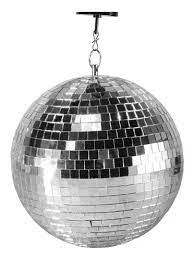

In [16]:
red, green, blue = img.split()
red

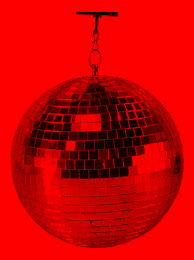

In [17]:
zeroed_band = red.point(lambda _: 0)
red_merge = Image.merge("RGB", (red, zeroed_band, zeroed_band))
green_merge = Image.merge("RGB", (zeroed_band, green, zeroed_band))
blue_merge = Image.merge( "RGB", (zeroed_band, zeroed_band, blue))
red_merge

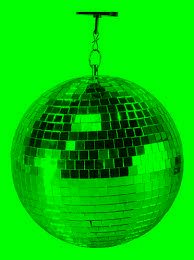

In [18]:
green_merge

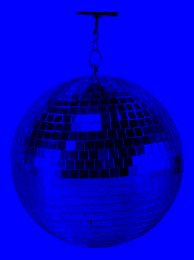

In [19]:
blue_merge

**Filtros de imagenes usando kernels convolucionales**


Uno de los metodos mas usados para el procesamiento de imagenes, y que mas adelante nos ayudara a entender mejor el
funcionamiento de las redes neuronales convolucionales es el uso de convolucion de imagenes por medio de kernels. Un kernel es una matriz simple.

**Blurring**

Esta técnica nos ayuda a hacer borrosa la imagen

In [20]:
from PIL import Image, ImageFilter
filename = "/content/BBVA.jpg"
with Image.open(filename) as img:
 img.load()

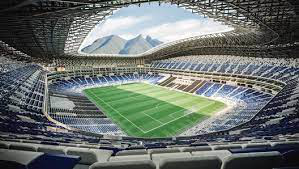

In [21]:
img

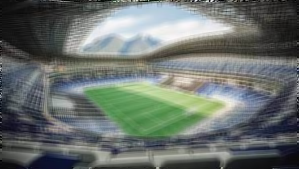

In [22]:
blur_img = img.filter(ImageFilter.BLUR)
blur_img

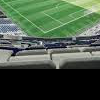

In [23]:
img.crop((100, 100, 200, 200))

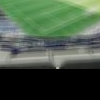

In [24]:
blur_img.crop((100, 100, 200, 200))

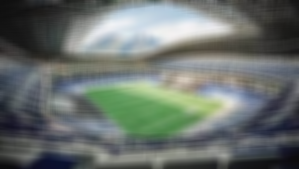

In [25]:
img.filter(ImageFilter.BoxBlur(5))

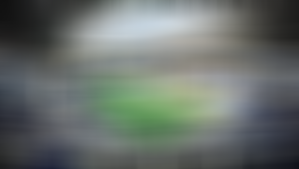

In [26]:
img.filter(ImageFilter.BoxBlur(20))

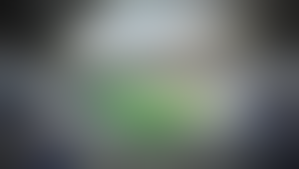

In [27]:
img.filter(ImageFilter.GaussianBlur(20))

**sharpening**

Esta técnica nos ayuda a a resaltar los bordes de la imagen


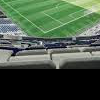

In [28]:
sharp_img = img.filter(ImageFilter.SHARPEN)
img.crop((100, 100, 200, 200))

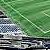

In [29]:
sharp_img.crop((100, 100, 150, 150))

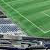

In [30]:
smooth_img = img.filter(ImageFilter.SMOOTH)
img.crop((100, 100, 150, 150))

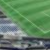

In [31]:
smooth_img.crop((100, 100, 150, 150))

**Deteccion de bordes, mejora de bordes y embossing**

In [59]:
from PIL import Image, ImageFilter
filename = "/content/Super.jpg"
with Image.open(filename) as img:
 img.load()

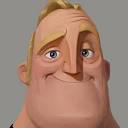

In [60]:
img

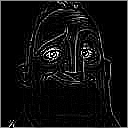

In [61]:
img_gray = img.convert("L")
edges = img_gray.filter(ImageFilter.FIND_EDGES)
edges

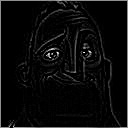

In [62]:
img_gray_smooth = img_gray.filter(ImageFilter.SMOOTH)
edges_smooth = img_gray_smooth.filter(ImageFilter.FIND_EDGES)
edges_smooth

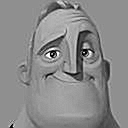

In [63]:
edge_enhance = img_gray_smooth.filter(ImageFilter.EDGE_ENHANCE)
edge_enhance

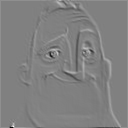

In [64]:
emboss = img_gray_smooth.filter(ImageFilter.EMBOSS)
emboss


**Segmentacion de imagenes y superposicion**

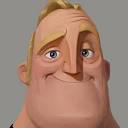

In [52]:
from PIL import Image
filename_sup = "/content/Super.jpg"
with Image.open(filename_sup) as img_sup:
 img_sup.load()

img_sup

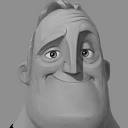

In [53]:
img_sup_gray = img_sup.convert("L")
img_sup_gray

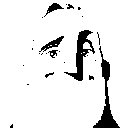

In [54]:
threshold = 100
img_sup_threshold = img_sup_gray.point(
 lambda x: 255 if x > threshold else 0
)
img_sup_threshold

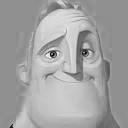

In [55]:
red, green, blue = img_sup.split()
red

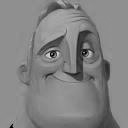

In [56]:
green

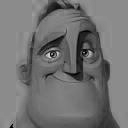

In [57]:
blue

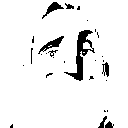

In [58]:
threshold = 57
img_sup_threshold = blue.point(lambda x: 255 if x > threshold else 0)
img_sup_threshold = img_sup_threshold.convert("1")
img_sup_threshold

Erosion y dilatacion

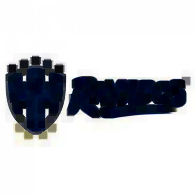

In [82]:
from PIL import ImageFilter
filename = "/content/Rayados.jpg"
with Image.open(filename) as img:
 img.load()
for _ in range(3):
 img = img.filter(ImageFilter.MinFilter(3))
img

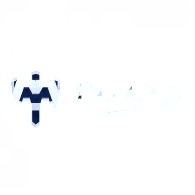

In [83]:
with Image.open(filename) as img:
 img.load()
for _ in range(3):
 img = img.filter(ImageFilter.MaxFilter(3))
img

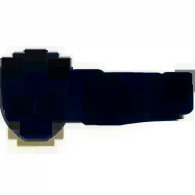

In [84]:
with Image.open(filename) as img:
 img.load()
for _ in range(10):
 img = img.filter(ImageFilter.MinFilter(3))
img

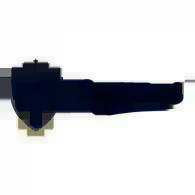

In [85]:
for _ in range(10):
 img = img.filter(ImageFilter.MaxFilter(3))
img

In [86]:
def erode(cycles, image):
 for _ in range(cycles):
  image = image.filter(ImageFilter.MinFilter(3))
 return image
def dilate(cycles, image):
 for _ in range(cycles):
  image = image.filter(ImageFilter.MaxFilter(3))
 return image

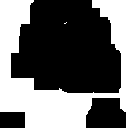

In [87]:
step_1 = erode(12, img_sup_threshold)
step_1

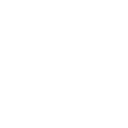

In [88]:
step_2 = dilate(58, step_1)
step_2

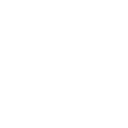

In [89]:
sup_mask = erode(45, step_2)
sup_mask

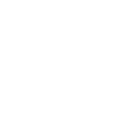

In [90]:
sup_mask = sup_mask.convert("L")
sup_mask = sup_mask.filter(ImageFilter.BoxBlur(20))
sup_mask

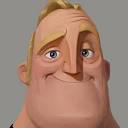

In [103]:
blank = img_sup.point(lambda _: 0)
sup_segmented = Image.composite(img_sup, blank, sup_mask)
sup_segmented

**Crear una marca de agua**

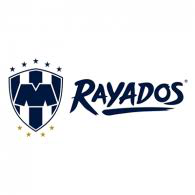

In [105]:
logo = "/content/Rayados.jpg"
with Image.open(logo) as img_logo:
 img_logo.load()
img_logo = Image.open(logo)
img_logo

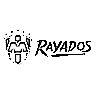

In [106]:
img_logo = img_logo.convert("L")
threshold = 50
img_logo = img_logo.point(lambda x: 255 if x > threshold else 0)
img_logo = img_logo.resize(
 (img_logo.width // 2, img_logo.height // 2)
)
img_logo = img_logo.filter(ImageFilter.CONTOUR)
img_logo


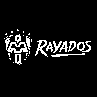

In [107]:
img_logo = img_logo.point(lambda x: 0 if x == 255 else 255)
img_logo

In [111]:
from PIL import Image, ImageFilter
filename = "/content/BBVA.jpg"
with Image.open(filename) as imgBBVA:
 imgBBVA.load()

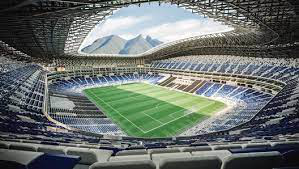

In [112]:
imgBBVA

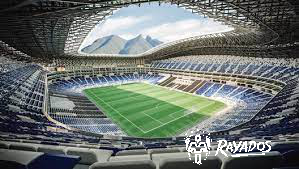

In [115]:
imgBBVA.paste(img_logo, (180, 100), img_logo)
imgBBVA

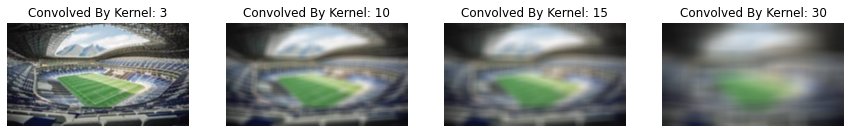

In [119]:
import numpy as np
import imageio
import matplotlib.pyplot as plt
from scipy.signal import convolve2d

def Convolution(image, kernel):
 conv_bucket= []
 for d in range(image.ndim):  
   conv_channel= convolve2d(image[:,:,d], kernel,
                              mode="same", boundary="symm")
   conv_bucket.append(conv_channel)
 return np.stack(conv_bucket, axis=2).astype("uint8")


kernel_sizes= [3,10,15,30]
fig, axs=plt.subplots(nrows=1, ncols=len(kernel_sizes), figsize=(15,15));

pic =imageio.imread('/content/BBVA.jpg')

for k, ax in zip(kernel_sizes, axs):
 kernel =np.ones((k,k))
 kernel /=np.sum(kernel)
 ax.imshow(Convolution(pic, kernel));
 ax.set_title("Convolved By Kernel: {}".format(k));
 ax.set_axis_off();
